### 6. 이미지 표현하기
+ 컴퓨터 비전에서 가장 중요한 데이터 유형은 당연히 이미지다. 이미지를 표현하는 가장 직접적인 방법은 아마도 __이미지 각 픽셀의 그레이스케일 값을__ 사용하는 것이다.
  + 일반적으로 그레이스케일 값은 설명하고자 하는 데이터를 잘 나타내지 않는다.
  + 예를 들어, 어떤 단일 픽셀의 그레이스케일 값이 128인 것을 알게 된다고 해서, 그 픽셀이 속한 객체를 파악할 순 없을것이다. 
  + 따라서 그레이스케일 값은 매우 효과적인 이미지 기능이 아닌 것을 알 수 있다.
####   
  
  
1) 색상 공간 사용
+ 또한 색상에 원시 그레이스케일 값으로 캡처할 수 없는 정보가 있음을 알 수 있다. 대부분의 경우, 기존 RGB 색상 공간에서 이미지의 모든 픽셀은 R, G, B의 강도 값을 얻는다. 그러나 OpenCV는 HSV, HSL, Lab 색상 공간과 같은 다른 색상 공간을 제공한다.

####   

2) RGB 공간에서 이미지 인코딩
+ RGB color space는 사람의 눈으로 볼 수 있는 많은 색 공간을 다루기 때문에 일상생활에서 유용하다. 
+ OpenCV에서는 실제로 컬러 이미지가 BGR 이미지로 저장된다. 
  + 대부분 역사적으로 빨-녹-파가 아니라 파-녹-빨을 사용해왔기 때문이다.

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img_bgr = cv2.imread('../image_for_md/lena.jpg')

+ 참고로 matplotlib 또는 유사한 라이브러리를 사용해 BGR 이미지를 표시하려고 한다면 이미지에 이상한 푸른 색조(tint)가 띔을 파악할 수 있다. 그 이유는 Matplotlib는 RGB 이미지를 기대하기 때문이다. 이를 위해 cv2.cvtColor를 사용해 색상 채널을 바꿔줘야 한다.

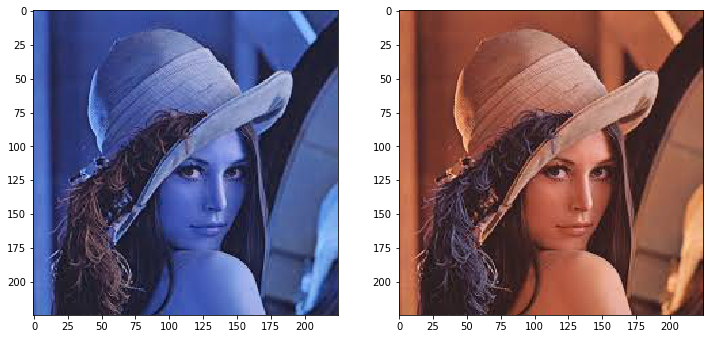

In [2]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_bgr)
plt.subplot(122)
plt.imshow(img_rgb)

+ 왼쪽은 bgr을 rgb로 인식해 프린트한 사진이기 때문에 색상이 퍼렇다.

####   

  
3) HSV 및 HLS 공간에서 이미지 인코딩
+ RGB만으로는 인간의 시각을 제대로 표현하지 못하기 때문에 Hue(색조), Saturation(채도), Value(값)를 나타내는 HSV, Hue, Lightness(명도), Saturation을 나타내는 HLS color space가 나타났다. 
+ 이런 color space에서 색상의 색조는 단일 색조 채널로 캡쳐되고, colorfulness(색상)는 saturation channel(채도 채널)로 캡처되며, 명도 또는 brightness(밝기)는 명도 또는 value 채널로 캡처된다.

In [3]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

+ 추가적으로 Lab(밝기, 녹색-빨간색, 파란색-노란색), YUV(전체 휘도(luminance), 파란색-휘도, 빨간색-휘도)의 컬러 스페이스도 있다.

####   

  
4) 이미지의 코너 검출하기
+ 이미지에서 찾을 수 있는 가장 직접적인 특징 중 하나는 Corner(코너, 모서리)일 것이다.
+ OpenCV에서는 이미지의 코너를 찾기 위해 최소한 다음의 두 가지 알고리즘을 제공한다.
  1. __Harris corner detection(해리스 코너 검출기)__ : Edge(에지, 가장자리)가 모든 방향으로 높은 강도(intensity)의 변화가 있는 영역임을 알고, Harris와 Stephens는 그러한 영역을 빠르게 찾을 수 있는 방법을 제안했다. cv2.cornerHarris를 사용한다.
  2. __Shi-Tomasi(쉬-토마시) corner detection__ : Shi와 Tomasi는 일반적으로 가장 강한 강도의 모서리를 찾아서 해리스 코너 검출보다 잘 수행할 수 있다. 이 알고리즘은 cv2.goodFeaturesToTrack로 구현됐다.
+ 해리스 코너 검출기는 그레이스케일 이미지에서만 작동하므로 먼저 변환을 해야한다.

In [4]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

+ 알고리즘은 입력 이미지, 코너 검출을 위해 고려된 픽셀 인접 크기(blockSize), 에지 검출을 위한 조리개 매개변수(ksize), 해리스 검출기의 free 매개변수(k)를 사용한다.

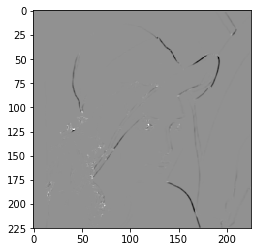

In [5]:
corners = cv2.cornerHarris(img_gray, 2, 3, 0.04)

plt.imshow(corners, cmap='gray')

+ 보이는 것과 같이 그레이 스케일 이미지에서 엣지가 검출되었다.
####    
  
    
5) SIFT 사용하기
+ 이미지의 크기가 변경될 때 코너 검출로는 충분하지가 않기 때문에, David Lowe는 방향과 크기에 관계없이 이미지에서 흥미로운 부분을 나타내기 위한 방법을 제시했다. 따라서 이름을 __SIFT(Scale-Invariant Feature Transform. 스케일에 불변한 특징 변화)__라고 한다.

In [6]:
sift = cv2.xfeatures2d.SIFT_create()

+ 이 알고리즘은 일반적으로 다음의 두 단계로 작동한다.
  1. 검출 : 이 단계는 이미지의 특징점(intersting point)을 식별한다.
  2. 계산 : 이 단계는 모든 특징점의 실제 특징 값을(actual feature values) 계산한다.
  + 특징점은 __detect 함수로 검출__한다.

In [7]:
kp = sift.detect(img_bgr)

+ kp에 특징점이 식별됐으니 drawKeypoints 함수로 시각화한다.

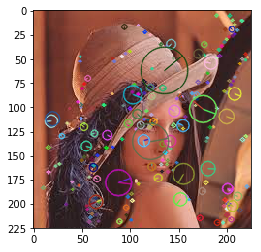

In [9]:
import numpy as np
img_kp = np.zeros_like(img_bgr)
img_kp = cv2.drawKeypoints(img_rgb, kp, img_kp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp)

+ 선택적 flags에서 저 값을 사용해 중요도를 크기로 나타내는 원을 사용하고, 특징점 및 방향을 나타내는 방사형 선으로 시각화한다.
####   
  
  
+ 특징 기술자는 __compute 함수를 사용해 계산__할 수 있다.

In [10]:
kp, des = sift.compute(img_bgr, kp)

+ 특징 기술자(des)는 발견된 모든 특징점에 대한 128개의 특성 값을 가진다. 
  + 이 예에서는 총 238개의 특징이 있으며, 각 특징에는 128개의 특징 값들이 있다.

In [11]:
des.shape

(238, 128)

####    
+ 또는 단 한계만으로 특징점을 __검출__하고 특징 기술자를 __계산__할 수 있다. 

In [12]:
kp2, des2 = sift.detectAndCompute(img_bgr, None)

####   
+ Numpy를 사용해 des의 모든 값이 des2와 거의 동일함을 확인하고 두 방법 모두 동일한 결과를 산출한다는 것을 확인할 수 있다.

In [13]:
np.allclose(des, des2)

True

####   
  
  
6) SURF 사용하기
+ SIFT가 좋긴 하지만, 빠르지가 않기 때문에 SURF(Speeded Up Robust Features)가 제공된다. 
  + 이는 SIFT에서 많은 계산이 필요한 부분을 박스 필터로 대체했다.
  + OpenCV에서 SIFT와 SURF는 완전 동일한 방식으로 작동한다.

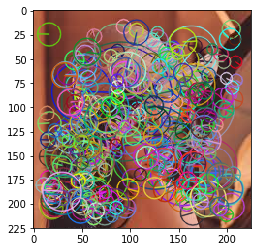

In [15]:
surf = cv2.xfeatures2d.SURF_create()
kp = surf.detect(img_bgr)
img_kp = cv2.drawKeypoints(img_rgb, kp, img_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp)

+ SUFR는 SIFT보다 더 많은 특징을 검출한다. 

In [16]:
kp, des = surf.compute(img_bgr, kp)
des.shape

(351, 64)

+ 결과에서 확인할 수 있듯 351개의 특징이 64개의 특징 값을 갖는 것을 확인할 수 있다.

####   
7) 특허법 : SIFT와 SRUF는 모두 특허법에 의해 보호되니 대안이 될 오픈소스 cv2를 사용하자. ORB에서는 성능 및 계산 비용 면에서 SIFT 및 SURF와 일치하는 FAST 특징점 검출기와 BRIEF 기술자를 사용할 수 있다.